# 회귀분석

* 변수들간의 인과관계를 밝히고 모형을 적합하여 관심 있는 변수를 예측하거나 추론하기 위해 사용하는 분석기법

* 선형회귀분석의 가정
    * 오차의 등분산성
    * 오차의 독립성
    * 오차의 정규성 : `Q-Q plot`, `Kolmogorov-Smirnov 검정`, `Shapiro-Wilk` 검정을 확인하여 정규성을 확인한다.

## 회귀분석 시 검토사항

`1.` 모형 내의 개별 회귀계수에 대한 검정

`2`. 모형에 설명력 $R^2$값을 통해 확인, 독립변수의 수가 많아지면 $adj-R^2$ 값을 확인

`3.` 회귀모형이 통계적으로 유의한가 확인

`4.` 잔차 plot을 통해 모형의 진단

## R실습 - 단순선형회귀분석

`Cars93` 데이터의 `엔진크기(EngineSize)`를 독립변수, `가격(Price)`를 종속변수로 선정하여 단순 선형회귀분석을 실시한 후, 추정된 회귀모형에 대해 해석해보자.

In [2]:
library(MASS)
library(lmtest) ## 더비왓슨 테스트를 위함
library(tidyverse)
select <- dplyr::select

In [3]:
fit1 <- lm(Price~EngineSize,data=Cars93)
summary(fit1)


Call:
lm(formula = Price ~ EngineSize, data = Cars93)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.684  -4.627  -1.795   2.592  39.429 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.6692     2.2390   2.085   0.0398 *  
EngineSize    5.5629     0.7828   7.107 2.59e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.789 on 91 degrees of freedom
Multiple R-squared:  0.3569,	Adjusted R-squared:  0.3499 
F-statistic: 50.51 on 1 and 91 DF,  p-value: 2.588e-10


In [39]:
fit1.1 <- lm(Price~ EngineSize +Horsepower +RPM + Width + Length + Weight,Cars93)
summary(fit1.1)


Call:
lm(formula = Price ~ EngineSize + Horsepower + RPM + Width + 
    Length + Weight, data = Cars93)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.659  -3.022  -0.144   2.376  27.955 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 77.117445  24.957836   3.090  0.00270 ** 
EngineSize   0.405792   1.699372   0.239  0.81184    
Horsepower   0.141609   0.028745   4.926 4.02e-06 ***
RPM         -0.001575   0.001933  -0.815  0.41751    
Width       -1.714985   0.386433  -4.438 2.68e-05 ***
Length       0.152837   0.076182   2.006  0.04798 *  
Weight       0.006586   0.002479   2.657  0.00939 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.45 on 86 degrees of freedom
Multiple R-squared:  0.7024,	Adjusted R-squared:  0.6817 
F-statistic: 33.83 on 6 and 86 DF,  p-value: < 2.2e-16


In [4]:
options(repr.plot.res=200,repr.plot.width=10,repr.plot.height=4)

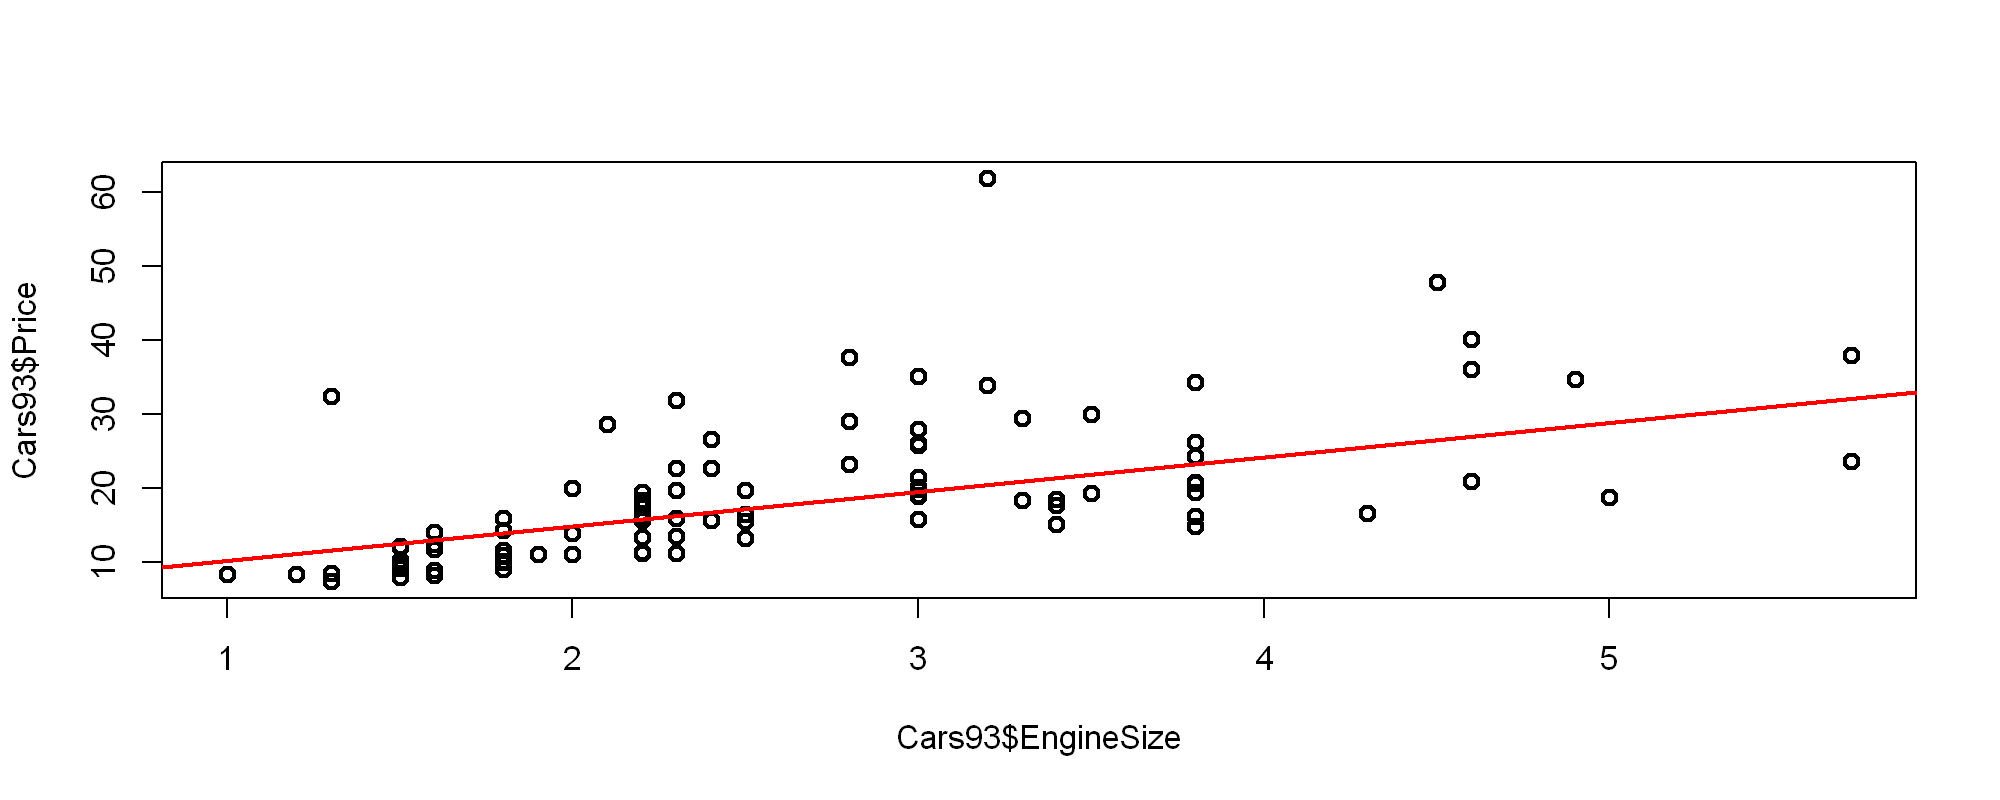

In [5]:
plot(Cars93$EngineSize,Cars93$Price,lwd=2)
abline(a=coefficients(fit1)[2],b=coefficients(fit1)[1],col="red",lwd=2)

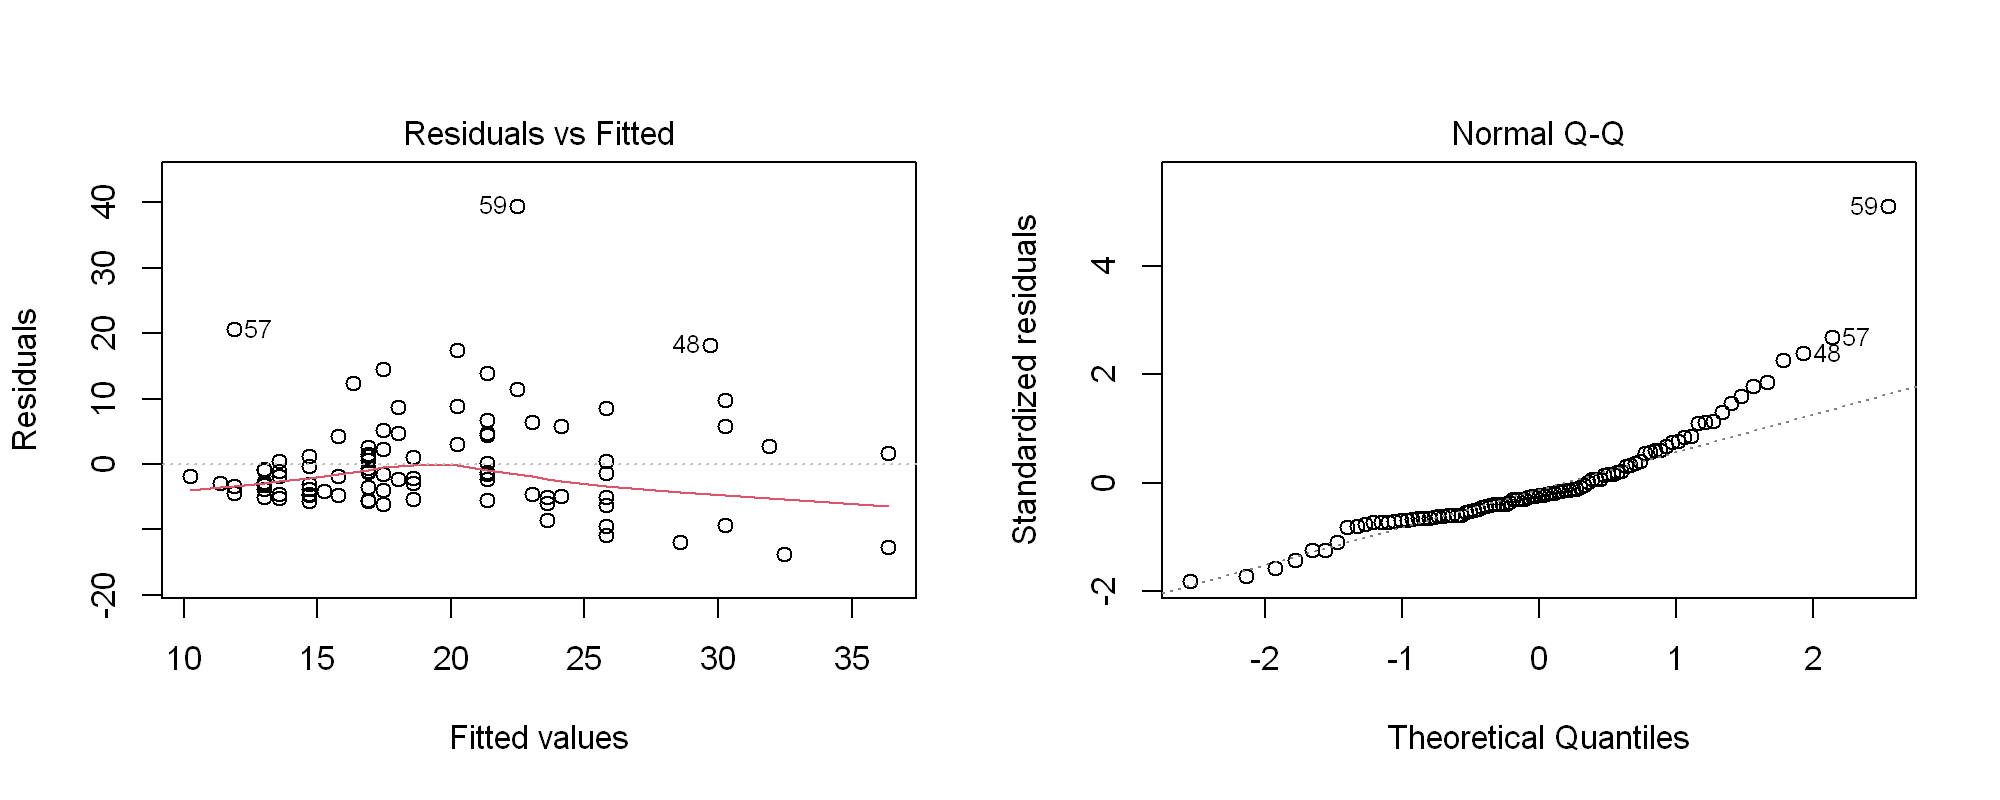

In [6]:
par(mfrow=c(1,2))
plot(fit1,1); plot(fit1,2)

In [7]:
shapiro.test(resid(fit1))


	Shapiro-Wilk normality test

data:  resid(fit1)
W = 0.85365, p-value = 3.886e-08


In [8]:
dwtest(fit1,alternative="two.sided")


	Durbin-Watson test

data:  fit1
DW = 1.1716, p-value = 2.236e-05
alternative hypothesis: true autocorrelation is not 0


`1`. 추정된 회귀계수는 모두 통계적으로 유의하다.

`2`. 결정계수값과 수정된 결정계수 값이 각각 0.3569, 0.3499 로 산출되었다.

`3.` `F-통계량`의 근거한 `p-value`값을 보아도 생성된 모델은 통계적으로 유의하다.

`4.` 잔차 plot 을 그려본 결과 오차항의 정규성과 독립성 가정이 위배된 것 같다.
    * 실제로 test 결과 위배되었다는 결론이 통계적으로 유의미했다.

`5.` 따라서 모형의 식별 단계로 돌아가 새로운 모형을 적합할 필요가 있어보인다.

In [9]:
test <- Cars93 %>% select(EngineSize)  %>% sample_n(5)

In [10]:
predict(fit1,test,interval="none") ##점추정

1        2        3        4        5 
17.46395 18.57654 11.90101 13.56989 13.01360

In [11]:
predict(fit1,test,interval="confidence") # 회귀계수에 대한 신뢰구간을 고려한 구간
predict(fit1,test,interval="prediction") # 회귀계수에 대한 신뢰구간과 오차항을 고려한 구간

,fit,lwr,upr
1,17.46395,15.760824,19.16708
2,18.57654,16.951202,20.20188
3,11.90101,9.237103,14.56492
4,13.56989,11.261220,15.87857
5,13.01360,10.590702,15.43650


,fit,lwr,upr
1,17.46395,1.899436,33.02847
2,18.57654,3.020344,34.13273
3,11.90101,-3.797712,27.59973
4,13.56989,-2.072469,29.21225
5,13.01360,-2.646029,28.67323


## R실습 - 중회귀분석

* iris 데이터를 사용

* `R`에 `lm`함수는 범주형 변수를 자동으로 더미변수로 변환해줌

In [12]:
fit2 <- lm(Petal.Length~.,data=iris)
summary(fit2) 


Call:
lm(formula = Petal.Length ~ ., data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78396 -0.15708  0.00193  0.14730  0.65418 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.11099    0.26987  -4.117 6.45e-05 ***
Sepal.Length       0.60801    0.05024  12.101  < 2e-16 ***
Sepal.Width       -0.18052    0.08036  -2.246   0.0262 *  
Petal.Width        0.60222    0.12144   4.959 1.97e-06 ***
Speciesversicolor  1.46337    0.17345   8.437 3.14e-14 ***
Speciesvirginica   1.97422    0.24480   8.065 2.60e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2627 on 144 degrees of freedom
Multiple R-squared:  0.9786,	Adjusted R-squared:  0.9778 
F-statistic:  1317 on 5 and 144 DF,  p-value: < 2.2e-16


In [53]:
dwtest(fit2,alternative="two.sided")


	Durbin-Watson test

data:  fit2
DW = 1.6772, p-value = 0.03042
alternative hypothesis: true autocorrelation is not 0


In [55]:
shapiro.test(resid(fit2))


	Shapiro-Wilk normality test

data:  resid(fit2)
W = 0.99389, p-value = 0.78


## 최적회귀방정식의 선택

## 가. 단계적 변수선택(Stepwise Variable Selection)

`1.` 전진 선택법 (forward selection) : 절편만 있는 상수모형에서 시작하여 중요하다고 생각되는 설명변수부터 차례로 추가한다.

`2.` 후진 제거법 (backward elimination) : 모든 독립변수를 포함한 모형에서 출발하여 종속변수에 가장 적은 영향을 주는 변수부터 하나씩 제거하면서 더 이상 제거할 변수가 없을 때의 모형을 선택한다.

`3.` 단계적 방법 (stepwise method) : 전진선택법에 의해 변수를 추가하면서 새롭게 추가된 변수에 의해 기존 변수의 중요도가 약화되면 해당변수를 제거한다.

## 나. 벌점화된 선택기준

* 모형의 복잡도에 따라 벌점을 주는 방식으로 $AIC, BIC$ 값이 주로 사용된다.

## R실습 : 다중회귀모형 + 변수선택법

In [32]:
fit3 <- step(lm(Price~ EngineSize +Horsepower +RPM + Width + Length + Weight,Cars93),direction = "both")
summary(fit3)

Start:  AIC=322.11
Price ~ EngineSize + Horsepower + RPM + Width + Length + Weight

             Df Sum of Sq    RSS    AIC
- EngineSize  1      1.69 2556.1 320.17
- RPM         1     19.71 2574.1 320.82
<none>                    2554.4 322.11
- Length      1    119.55 2674.0 324.36
- Weight      1    209.73 2764.2 327.45
- Width       1    585.01 3139.4 339.29
- Horsepower  1    720.84 3275.3 343.22

Step:  AIC=320.17
Price ~ Horsepower + RPM + Width + Length + Weight

             Df Sum of Sq    RSS    AIC
- RPM         1     49.36 2605.5 319.95
<none>                    2556.1 320.17
+ EngineSize  1      1.69 2554.4 322.11
- Length      1    140.92 2697.0 323.16
- Weight      1    208.09 2764.2 325.45
- Width       1    593.56 3149.7 337.59
- Horsepower  1   1476.65 4032.8 360.57

Step:  AIC=319.95
Price ~ Horsepower + Width + Length + Weight

             Df Sum of Sq    RSS    AIC
<none>                    2605.5 319.95
+ RPM         1     49.36 2556.1 320.17
+ EngineSize  1     


Call:
lm(formula = Price ~ Horsepower + Width + Length + Weight, data = Cars93)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.956  -2.578  -0.182   2.114  28.448 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 53.005861  16.532269   3.206  0.00188 ** 
Horsepower   0.129653   0.016190   8.008 4.46e-12 ***
Width       -1.480623   0.339813  -4.357 3.56e-05 ***
Length       0.152968   0.072440   2.112  0.03755 *  
Weight       0.007339   0.002389   3.071  0.00283 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.441 on 88 degrees of freedom
Multiple R-squared:  0.6965,	Adjusted R-squared:  0.6827 
F-statistic: 50.48 on 4 and 88 DF,  p-value: < 2.2e-16


### Mallow's CP

$$ C_p = \frac{1}n (SSE+2p\hat{\sigma}^2)$$

* `Cp` 값이 `p(변수의 개수)`와 비슷한 경우 : `bias`가 작고 우수한 모델을 의미

* `Cp`값이 `p` 보다 큰 경우 : `bias`가 크고 추가적인 변수가 필요한 모델을 의미

* `Cp`값이 `p` 보다 작은 경우 : 분산의 증가폭보다 편향의 감소폭이 더 크며, 필요 없는 변수가 모델에 있다는 것을 의미

* 일반적으로 `Cp`값이 작고, `p+상수`에 가까운 모형을 선택한다.

In [41]:
library(olsrr)

In [45]:
ols_mallows_cp(fit1, fit1.1)## fit1.1은 fullmodel이라고 생각

[1] 96.85039

In [46]:
ols_mallows_cp(fit3,fit1.1) ## fit1.1은 fullmodel이라고 생각

[1] 4.7188

* `Cp` 통계량을 기준으로 보았을 때 $AIC$값과 단계적 선택법을 고려한 fit3가 fit1보다 적합한 모델이다.